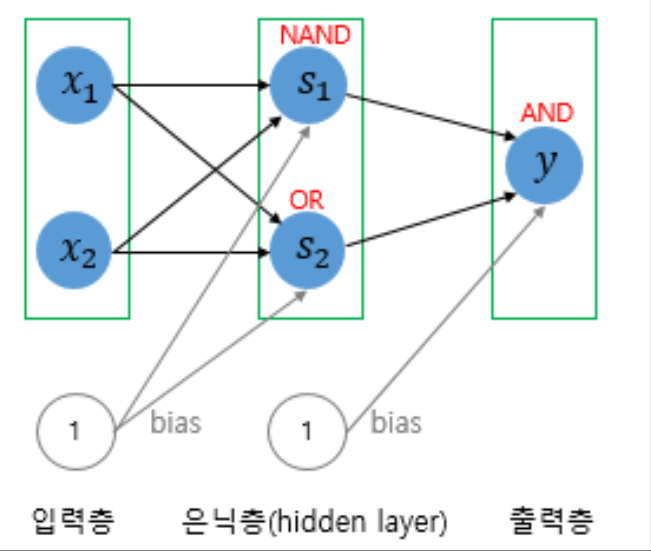

# 컴퓨터에 저장된 이미지 불러오기

In [4]:
!pip install IPython

In [5]:
from IPython.display import Image

#Image('파일이름을 넣어주세요')

# 퍼셉트론을 생성하는 예제

In [ ]:
model = Sequential() # 학습기 선택

model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(8))
model.add(Dense(7))
model.add(Dense(6))
model.add(Dense(1))

input_dim=1  --> 입력값 지정(차원 수) = 노드(뉴런) 1개

activation='relu' --> 활성화 함수 선택 (relu, sigmoid, softmax)

Dense(10) --> 첫번째 히든레이어

Dense(8) --> 두번째 히든레이어

Dense(7) --> 세번째 히든레이어

Dense(6) --> 네번째 히든레이어

Dense(1)  --> 출력값을 지정

# 실습

In [14]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [15]:
# 입력데이터와 출력데이터가 같다.

x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])

In [16]:
# 모델 (학습기) 호출
model = Sequential()

In [17]:
model.add(Dense(5, input_dim=1, activation='relu'))

In [18]:
model.add(Dense(3))

In [19]:
model.add(Dense(1))

In [21]:
# 모델링 컴파일 (mse --> 평균제곱오차법,  adam --> relu의 옵티마이저 중 하나)

model.compile(loss='mse', optimizer='adam')

In [23]:
# 손실함수 계산

model.fit(x, y, epochs=100, batch_size=1)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 15.8418
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 15.3513
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 14.8320
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 14.4184
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 14.0967
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 13.5998
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 13.2364
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 12.8338
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 12.5302
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 12.0806
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 11.7567
Epoch 12/100
5/5 [==============================] - 0s 1ms/step - loss: 11.4250
Epoch 13/100
5/5 [==============================]

In [24]:
mse = model.evaluate(x, y, batch_size=1)

5/5 [==============================] - 0s 4ms/step - loss: 0.1572


In [26]:
# 최종 손실율 계산(적게 만드는 것이 중요!)
print('최종 손실율 =', mse)

최종 손실율 = 0.15718987584114075


# 실습 : 퍼셉트론 AND 연산

In [28]:
# 파이썬2와 파이썬3에 모두 호환되도록 설정
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.random.set_seed(678) # 동일한 결과 획득을 위해 사용

# 상수 설정

In [29]:
T = 1.0
F = 0.0
bias = 1.0

In [33]:
# AND 함수 생성

def get_AND_data():
    X = [
        [F, F, bias],  # (0,0) = 0
        [F, T, bias],  # (0,1) = 0
        [T, F, bias],  # (1,0) = 0
        [T, T, bias]   # (1,1) = 1
    ]
    
    y = [
        [F], [F], [F], [T]
    ]
    
    return X,y

In [34]:
# OR 함수 생성

def get_OR_data():
    X = [
        [F, F, bias],  # (0,0) = 0
        [F, T, bias],  # (0,1) = 1
        [T, F, bias],  # (1,0) = 1
        [T, T, bias]   # (1,1) = 1
    ]
    
    y = [
        [F], [T], [T], [T]
    ]
    
    return X,y

In [35]:
# NAND 함수 생성

def get_NAND_data():
    X = [
        [F, F, bias],  # (0,0) = 1
        [F, T, bias],  # (0,1) = 1
        [T, F, bias],  # (1,0) = 1
        [T, T, bias]   # (1,1) = 0
    ]
    
    y = [
        [T], [T], [T], [F]
    ]
    
    return X,y

In [36]:
# XOR 함수 생성

def get_XOR_data():
    X = [
        [F, F, bias],  # (0,0) = 0
        [F, T, bias],  # (0,1) = 1
        [T, F, bias],  # (1,0) = 1
        [T, T, bias]   # (1,1) = 0
    ]
    
    y = [
        [F], [T], [T], [F]
    ]
    
    return X,y

#### 퍼셉트론에서는 AND, OR 연산은 가능하지만, XOR 연산이 불가능하다.

In [37]:
X, y = get_AND_data()

In [38]:
class Perceptron:
    def __init__(self):
        # 논리연산을 위한 입력값 X, Y와 편향값 (b)를 받을 것이므로, weight를 [3,1]로 설정합니다.  
        # 3은 세개의 입력을 의미하고, 1은 한개의 뉴론임을 의미합니다.
        self.W = tf.Variable(tf.random.normal([3, 1]))
    
    def train(self,X):
        err = 1
        epoch, max_epochs = 0, 20
        while err > 0.0 and epoch < max_epochs:
            epoch += 1
            self.optimize(X)
            # MSE (평균제곱오차)를 관찰하며, 학습이 진행되는 동안, 에러(MSE)가 줄어듬을 확인합니다.
            err = self.mse(y, self.pred(X)).numpy()
            print('epoch:', epoch, 'mse:', err)
    
    
    # @tf.function 과 AutoGraph 모듈을 사용하여 자동으로 그래프로 변환해줍니다
    # Python code 함수를 정의하기 전에 @tf.function 데코레이터를 써주면 됩니다. 
    @tf.function
    def faster_pred(self, X):
        return self.step(tf.matmul(X, self.W))
    
    def pred(self, X):
        return self.step(tf.matmul(X, self.W))
       
    def mse(self, y, y_hat):
        return tf.reduce_mean(tf.square(tf.subtract(y, y_hat)))
    
    def step(self,x):
        # step(x) = { 1 if x > 0; 0 otherwise }
        return tf.dtypes.cast(tf.math.greater(x, 0), tf.float32)

    def optimize(self, X):
        """
        퍼셉트론은 경사하강법을 사용한 최적화가 불가능합니다.
        매번 학습을 진행할 때마다 가중치를 아래의 룰에 맞게 업데이트합니다.  

        if target == 1 and activation == 0:  
          w_new = w_old + input  

        if target == 0 and activation == 1:  
          w_new = w_old - input  

        위의 두가지 조건은 아래의 코드로 간단히 구현 가능합니다.  
        """
        delta = tf.matmul(X, tf.subtract(y, self.step(tf.matmul(X, self.W))), transpose_a=True)
        self.W.assign(self.W+delta)


In [39]:
# 학습 시작

perceptron = Perceptron()

In [40]:
# mse 값이 작을수록 예측정확도가 높아진다는 의미이다.

perceptron.train(X)

epoch: 1 mse: 0.25
epoch: 2 mse: 0.5
epoch: 3 mse: 0.25
epoch: 4 mse: 0.0


In [41]:
# 결과 테스트

print(perceptron.pred(X).numpy())

[[0.]
 [0.]
 [0.]
 [1.]]


# ----------------------------------------------------------------------------------------------

# --> XOR 연산은 단일 퍼셉트론으로는 안된다.

In [52]:
X, y = get_XOR_data()

In [53]:
class Perceptron:
    def __init__(self):
        # 논리연산을 위한 입력값 X, Y와 편향값 (b)를 받을 것이므로, weight를 [3,1]로 설정합니다.  
        # 3은 세개의 입력을 의미하고, 1은 한개의 뉴론임을 의미합니다.
        self.W = tf.Variable(tf.random.normal([3, 1]))
    
    def train(self,X):
        err = 1
        epoch, max_epochs = 0, 20
        while err > 0.0 and epoch < max_epochs:
            epoch += 1
            self.optimize(X)
            # MSE (평균제곱오차)를 관찰하며, 학습이 진행되는 동안, 에러(MSE)가 줄어듬을 확인합니다.
            err = self.mse(y, self.pred(X)).numpy()
            print('epoch:', epoch, 'mse:', err)
    
    
    # @tf.function 과 AutoGraph 모듈을 사용하여 자동으로 그래프로 변환해줍니다
    # Python code 함수를 정의하기 전에 @tf.function 데코레이터를 써주면 됩니다. 
    @tf.function
    def faster_pred(self, X):
        return self.step(tf.matmul(X, self.W))
    
    def pred(self, X):
        return self.step(tf.matmul(X, self.W))
       
    def mse(self, y, y_hat):
        return tf.reduce_mean(tf.square(tf.subtract(y, y_hat)))
    
    def step(self,x):
        # step(x) = { 1 if x > 0; 0 otherwise }
        return tf.dtypes.cast(tf.math.greater(x, 0), tf.float32)

    def optimize(self, X):
        """
        퍼셉트론은 경사하강법을 사용한 최적화가 불가능합니다.
        매번 학습을 진행할 때마다 가중치를 아래의 룰에 맞게 업데이트합니다.  

        if target == 1 and activation == 0:  
          w_new = w_old + input  

        if target == 0 and activation == 1:  
          w_new = w_old - input  

        위의 두가지 조건은 아래의 코드로 간단히 구현 가능합니다.  
        """
        delta = tf.matmul(X, tf.subtract(y, self.step(tf.matmul(X, self.W))), transpose_a=True)
        self.W.assign(self.W+delta)


In [54]:
# 학습 시작

perceptron = Perceptron()

In [55]:
# mse 값이 작을수록 예측정확도가 높아진다는 의미이다.

perceptron.train(X)

epoch: 1 mse: 0.75
epoch: 2 mse: 0.5
epoch: 3 mse: 0.5
epoch: 4 mse: 0.5
epoch: 5 mse: 0.5
epoch: 6 mse: 0.5
epoch: 7 mse: 0.5
epoch: 8 mse: 0.5
epoch: 9 mse: 0.5
epoch: 10 mse: 0.5
epoch: 11 mse: 0.5
epoch: 12 mse: 0.5
epoch: 13 mse: 0.5
epoch: 14 mse: 0.5
epoch: 15 mse: 0.5
epoch: 16 mse: 0.5
epoch: 17 mse: 0.5
epoch: 18 mse: 0.5
epoch: 19 mse: 0.5
epoch: 20 mse: 0.5


In [56]:
# 결과 테스트

print(perceptron.pred(X).numpy())

[[0.]
 [0.]
 [0.]
 [0.]]


# ----------------------------------------------------------------------------